# Imports

In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import rand_score, accuracy_score, confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.random_projection import GaussianRandomProjection
import umap.umap_ as umap
from scipy.cluster.hierarchy import dendrogram, linkage
from itertools import permutations

In [3]:
!git clone https://github.com/xvxnoah/wheet_clustering.git
%cd wheet_clustering

Cloning into 'wheet_clustering'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 13 (delta 4), reused 12 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 1.53 MiB | 5.98 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/wheet_clustering


# Problem 1: Preprocessing the dataset

In [4]:
from IPython.display import display
import math
import seaborn as sns

def data_explorer(df,max_columns=60,max_rows = 20, display_func=display):

  if not isinstance(df, pd.DataFrame):df=pd.DataFrame(df)
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)
  break_line="------------------------------------------------"
  print('data sample:')
  display_func(df)
  print(break_line)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_rows', None)
  print('data info:')
  display_func(df.info())
  print(break_line)
  # Check the general structure of the dataset
  print('data description:')
  display_func(df.describe())
  print(break_line)
  print('data nan check:')
  display_func(df.isna().sum())
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)

In [6]:
col_names = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
             'asymmetry_coef', 'kernel_groove_length', 'numerical_class']

df = pd.read_table('seeds.tsv', header=None, names=col_names)
data_explorer(df)

data sample:


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,numerical_class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


------------------------------------------------
data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   kernel_length         210 non-null    float64
 4   kernel_width          210 non-null    float64
 5   asymmetry_coef        210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
 7   numerical_class       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


None

------------------------------------------------
data description:


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,numerical_class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


------------------------------------------------
data nan check:


,0
area,0
perimeter,0
compactness,0
kernel_length,0
kernel_width,0
asymmetry_coef,0
kernel_groove_length,0
numerical_class,0


In [7]:
label_col='numerical_class'

In [9]:
# Normalize the features using Z-score normalization
scaler = StandardScaler()
features = df.drop(label_col, axis=1) # Drop numerical_class, we don't want to scale labels
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled[label_col] = df[label_col]
data_explorer(df_scaled)

data sample:


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,numerical_class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1
...,...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413,3
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156,3
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060,3
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535,3


------------------------------------------------
data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   kernel_length         210 non-null    float64
 4   kernel_width          210 non-null    float64
 5   asymmetry_coef        210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
 7   numerical_class       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


None

------------------------------------------------
data description:


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,numerical_class
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,210.000000
mean,-3.383537e-16,1.184238e-16,1.285744e-15,-2.097793e-15,-3.383537e-16,-3.383537e-16,-8.987520e-17,2.000000
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,0.818448
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00,1.000000
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01,1.000000
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01,2.000000
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01,3.000000
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00,3.000000


------------------------------------------------
data nan check:


,0
area,0
perimeter,0
compactness,0
kernel_length,0
kernel_width,0
asymmetry_coef,0
kernel_groove_length,0
numerical_class,0


# Problem 2: Determining the appropiate number of clusters

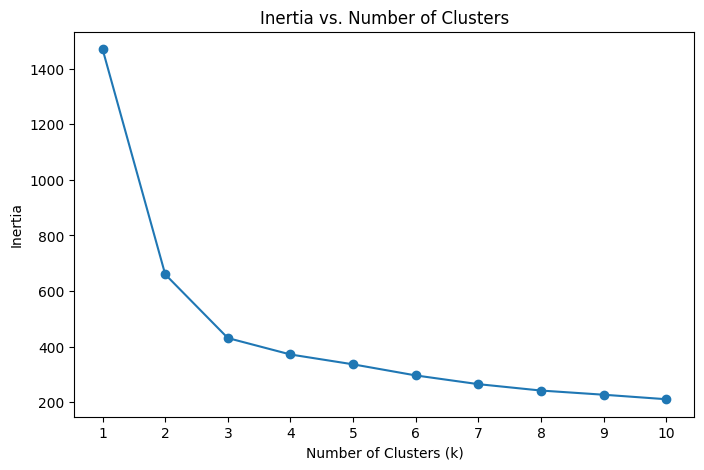

In [10]:
# Features without the class label
X = df_scaled.drop(label_col, axis=1)

# Range of k values to try
k_values = range(1, 11)

# List to store inertia values
inertia_values = []

# Compute inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia as a function of k
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.xticks(k_values)
plt.show()

# Problem 3: Visualizing the classes

# (a)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

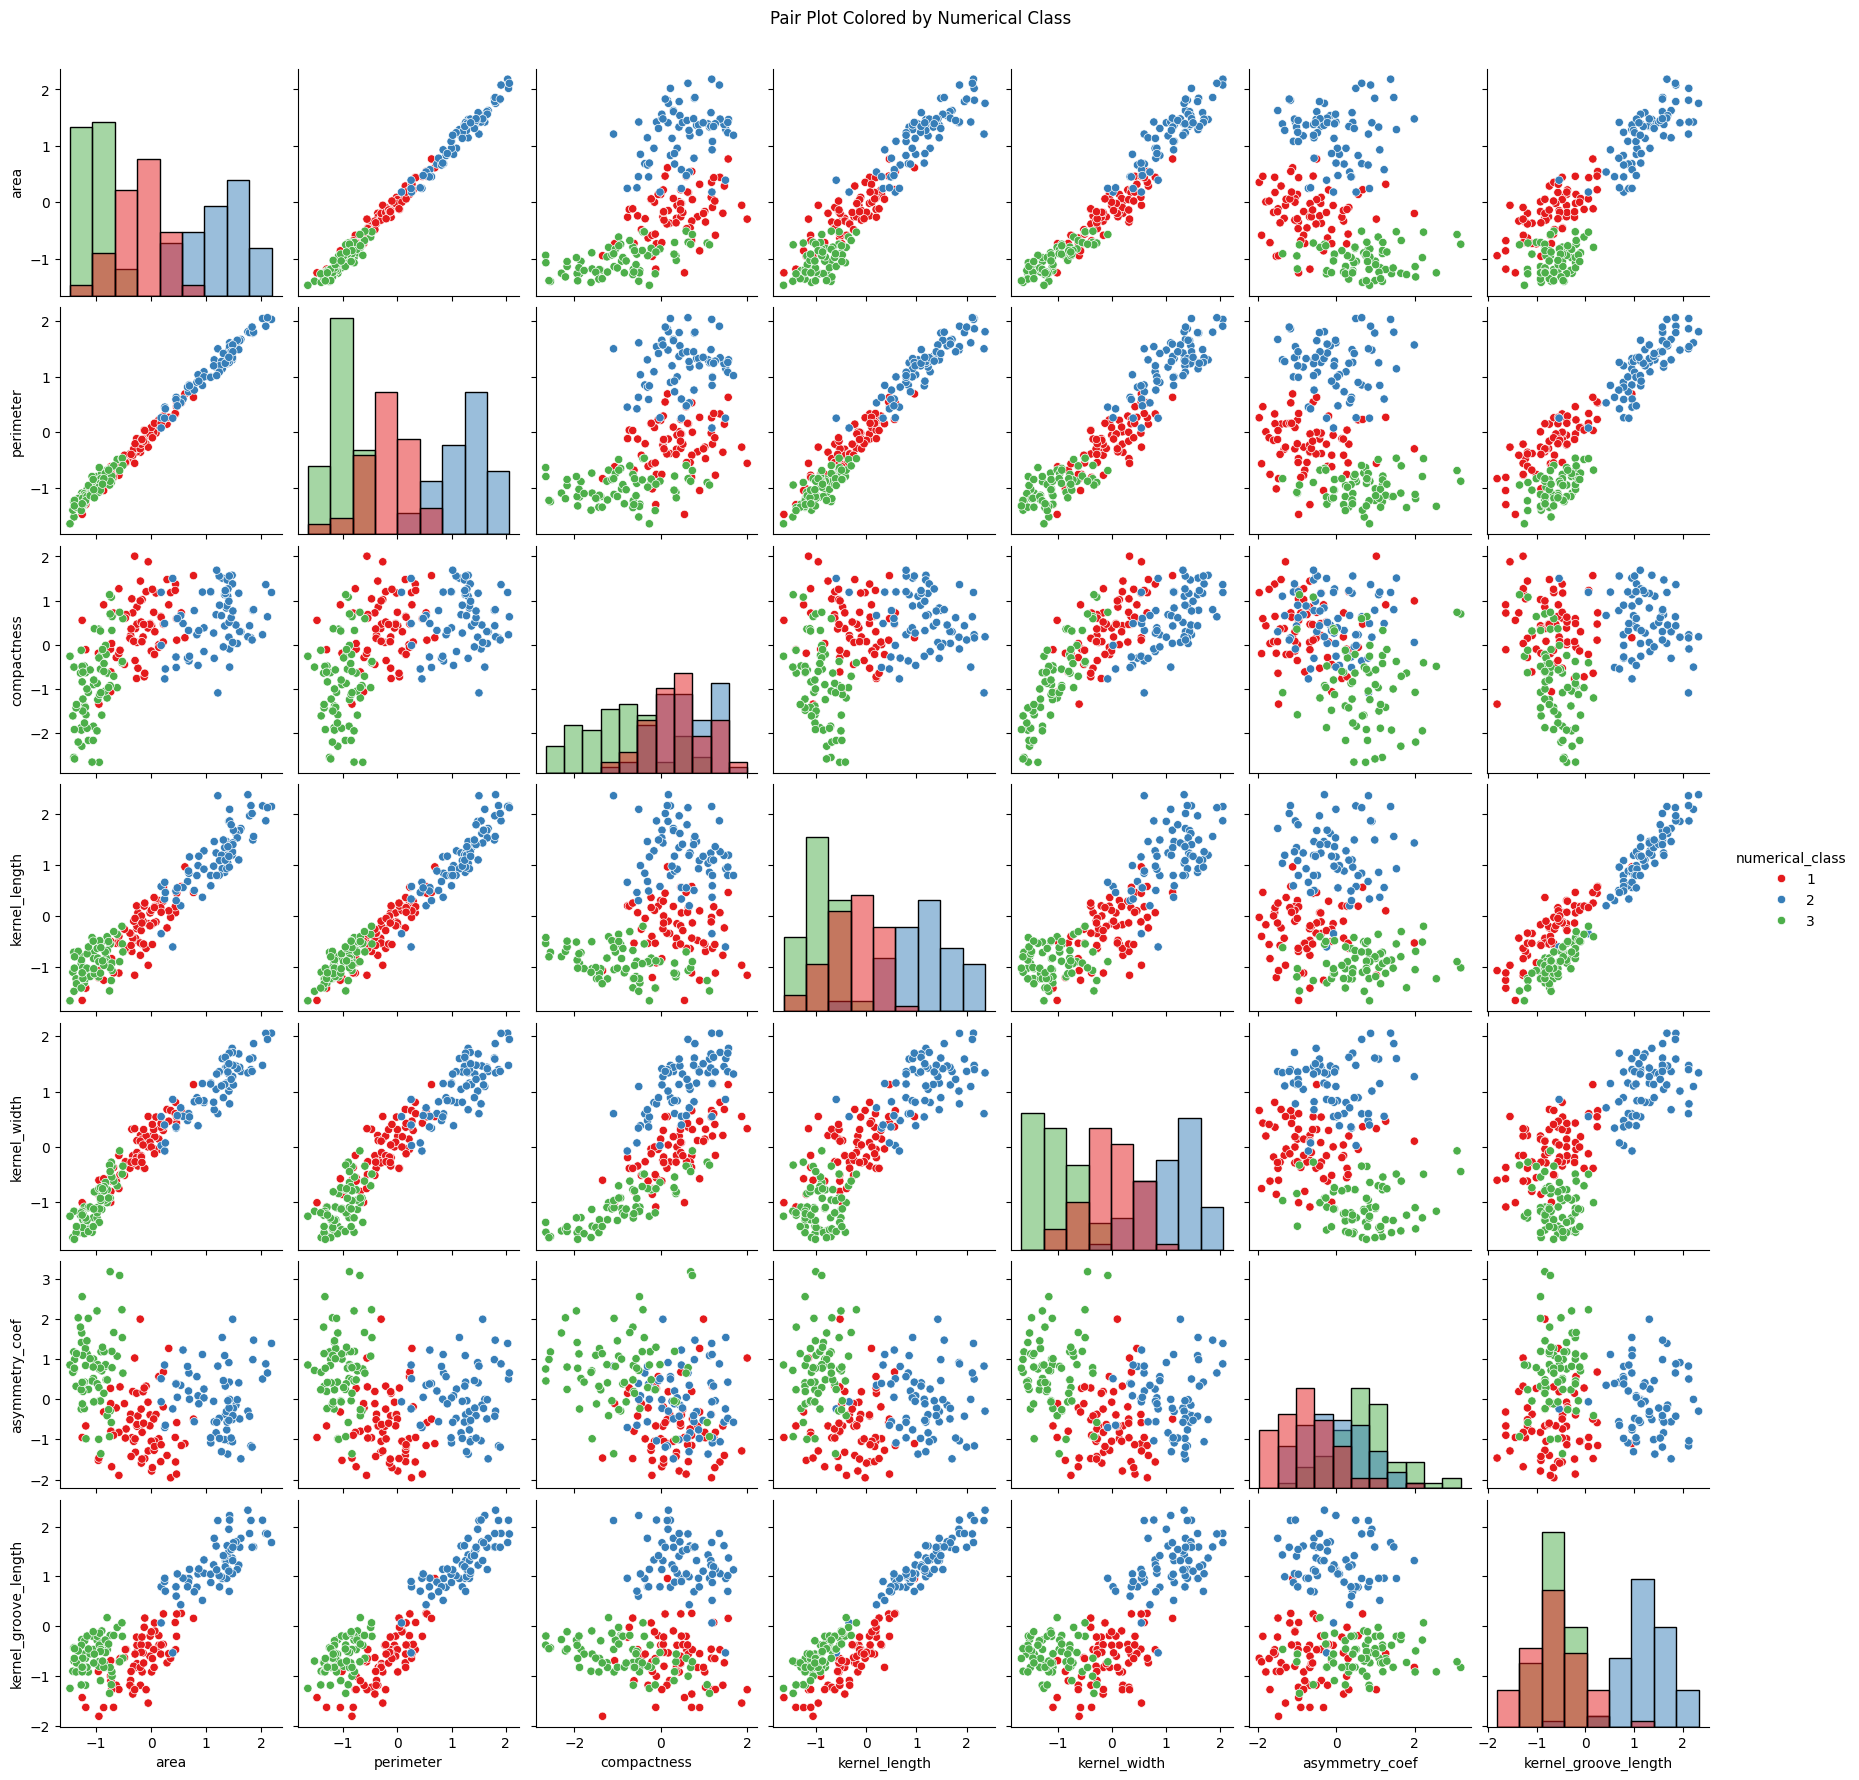

In [11]:
# Pairplot of all features colored by numerical class
sns.pairplot(df_scaled, hue=label_col, diag_kind='hist', palette='Set1')
plt.suptitle("Pair Plot Colored by Numerical Class", y=1.02)
plt.savefig('pairplt.pdf')

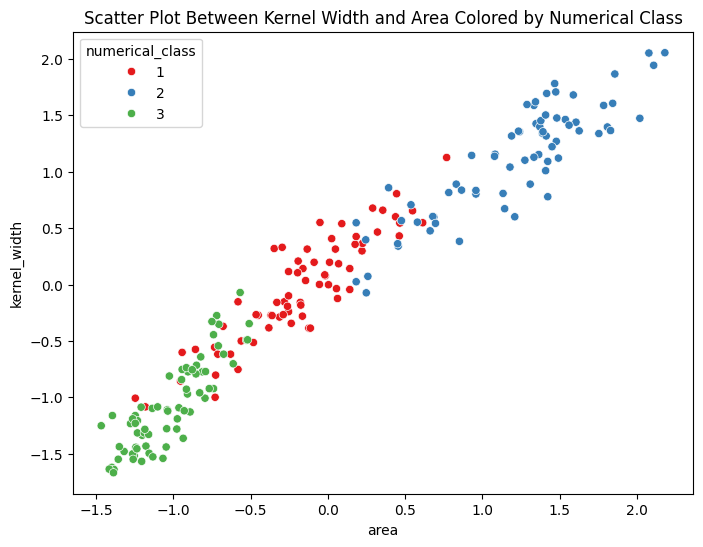

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='area', y='kernel_width', hue=label_col, palette='Set1')
plt.title("Scatter Plot Between Kernel Width and Area Colored by Numerical Class")
plt.savefig('scatterplt.pdf')

# (b)

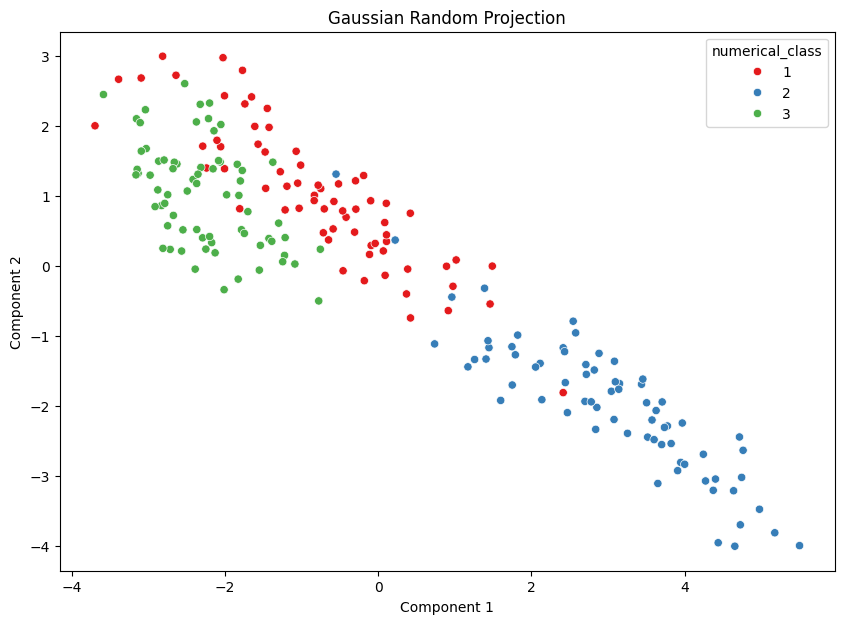

In [13]:
# Apply Gaussian Random Projection
grp = GaussianRandomProjection(n_components=2, random_state=42)
X_grp = grp.fit_transform(X)

# Create a DataFrame with the projected data
grp_df = pd.DataFrame(X_grp, columns=['Component 1', 'Component 2'])
grp_df[label_col] = df_scaled[label_col]

# Plot the projected data
plt.figure(figsize=(10, 7))
sns.scatterplot(data=grp_df, x='Component 1', y='Component 2', hue=label_col, palette='Set1')
plt.title('Gaussian Random Projection')
plt.savefig("gauss_3.pdf", format='pdf')

# (c)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


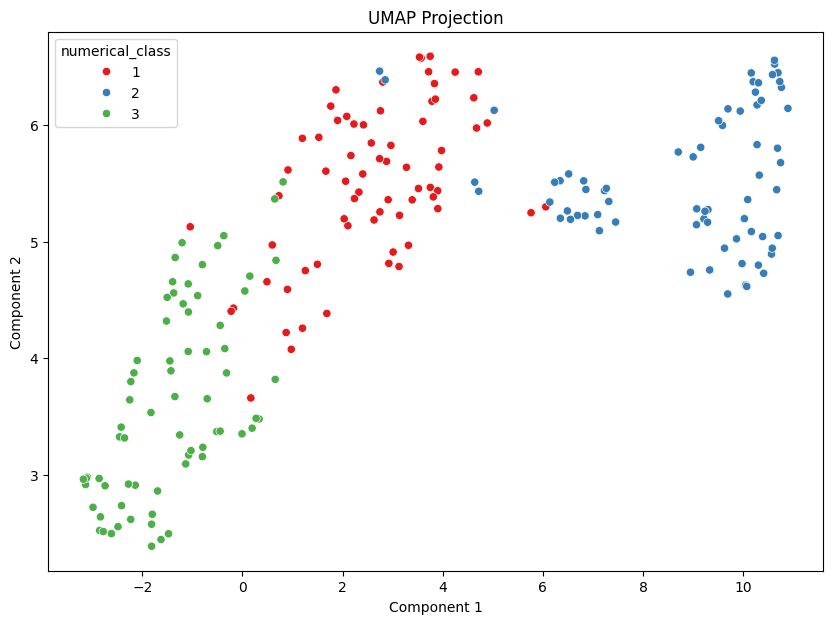

In [14]:
# Apply UMAP for dimensionality reduction
umap_reducer = umap.UMAP(random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Create a DataFrame with the UMAP components
umap_df = pd.DataFrame(X_umap, columns=['Component 1', 'Component 2'])
umap_df[label_col] = df_scaled[label_col]

# Plot the UMAP projection
plt.figure(figsize=(10, 7))
sns.scatterplot(data=umap_df, x='Component 1', y='Component 2', hue=label_col, palette='Set1')
plt.title('UMAP Projection')
plt.savefig("umap_projection.pdf", format='pdf')

# Problem 4: Evaluating clustering

In [16]:
# Extract features and true labels
X = df_scaled.drop(label_col, axis=1)
y_true = df[label_col].values

# Determine the number of unique classes
num_classes = np.unique(y_true).size

# Apply k-means clustering with k equal to the number of classes
kmeans = KMeans(n_clusters=num_classes, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Compute the Rand index
rand_idx = rand_score(y_true, cluster_labels)
print(f"Rand Index: {rand_idx:.4f}")

# Compute the Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Enumerate all permutations of cluster labels
label_permutations = list(permutations(range(num_classes)))
best_accuracy = 0
best_permutation = None

for perm in label_permutations:
    # Create a mapping from original cluster labels to permuted labels
    label_mapping = {original_label: permuted_label for original_label, permuted_label in zip(range(num_classes), perm)}
    # Map cluster labels using the current permutation
    mapped_labels = np.array([label_mapping[label] for label in cluster_labels])
    # Compute accuracy
    accuracy = accuracy_score(y_true, mapped_labels)
    # Update best accuracy and permutation
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_permutation = perm

print(f"Best Accuracy after permutation: {best_accuracy:.4f}")
print(f"Best Permutation (Cluster Label -> Class Label): {best_permutation}")

Rand Index: 0.9103
Silhouette Score: 0.4024
Best Accuracy after permutation: 0.6190
Best Permutation (Cluster Label -> Class Label): (2, 0, 1)


# Problem 5: Agglomerative clustering

Accuracy with 'ward' linkage: 0.6190
Accuracy with 'complete' linkage: 0.5429
Accuracy with 'average' linkage: 0.5857
Accuracy with 'single' linkage: 0.3381

Best Linkage Method: ward
Best Accuracy: 0.6190
Best Permutation (Cluster Label -> Class Label): (1, 2, 0)


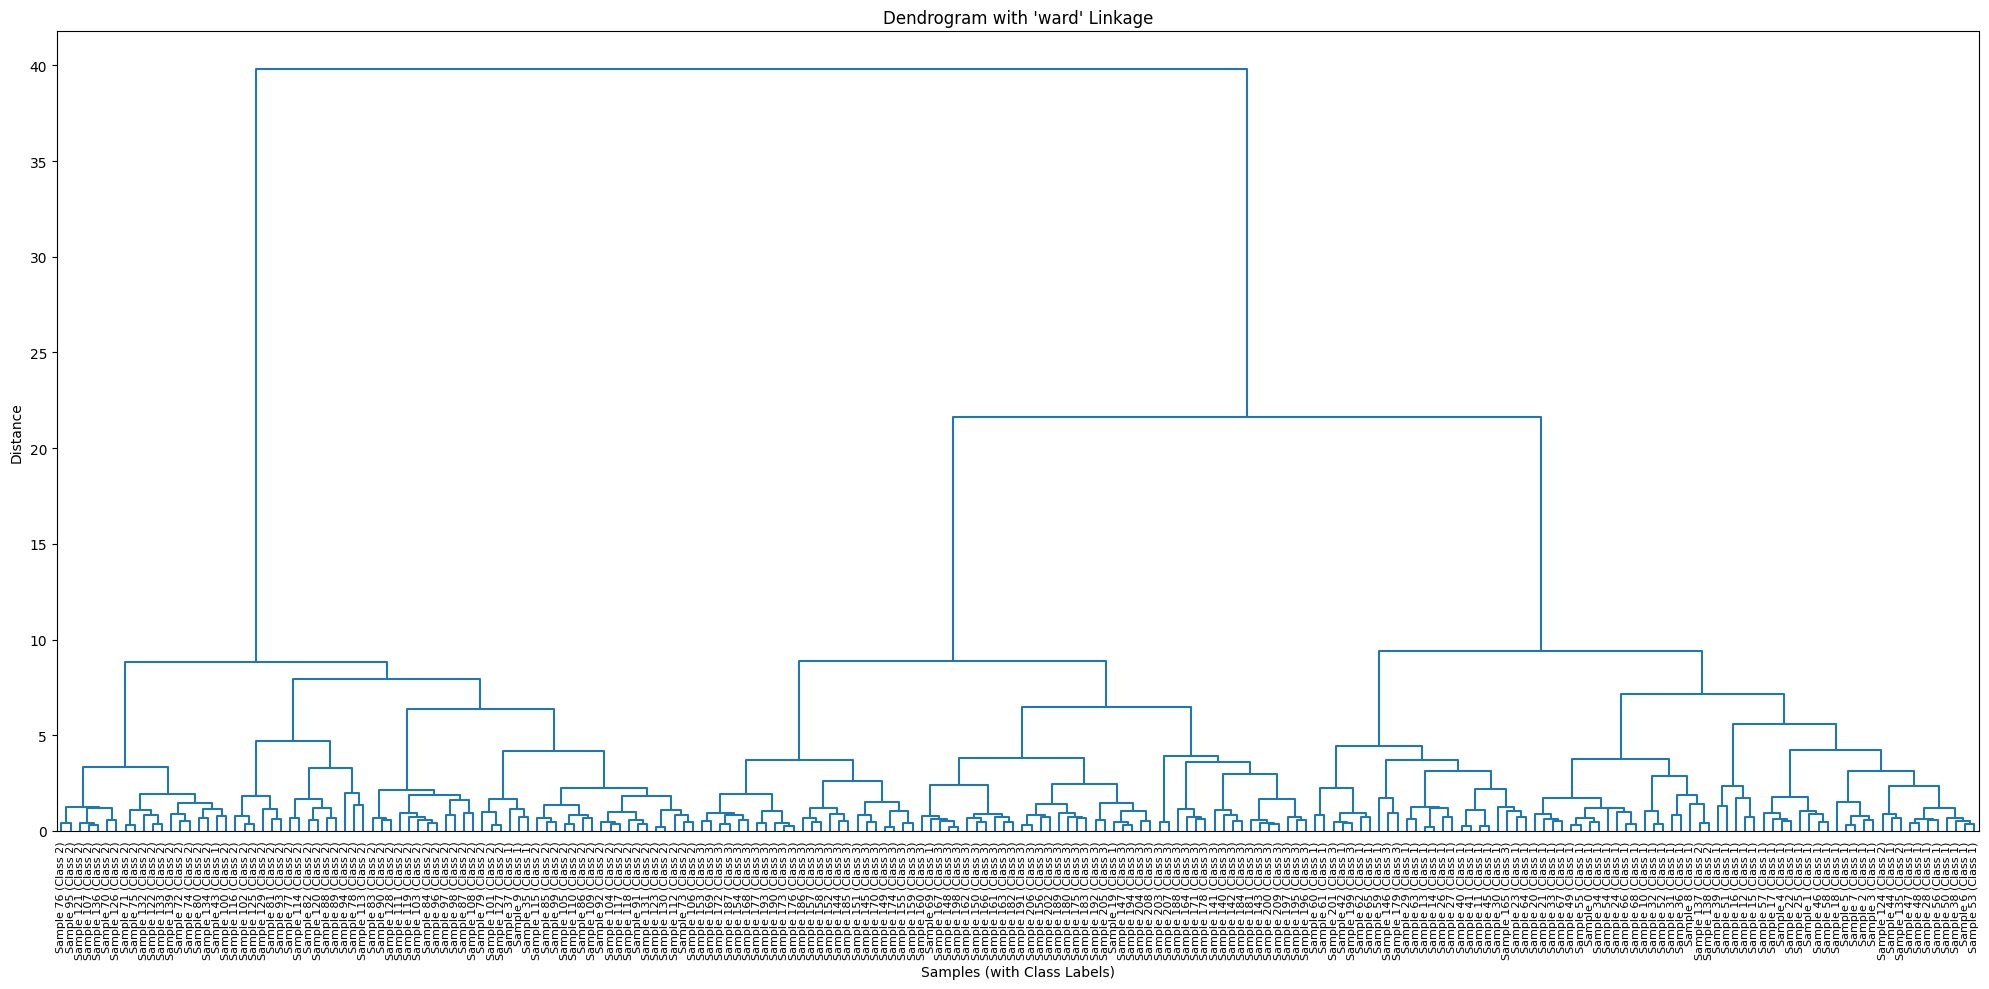

In [18]:
# Features without the class label
X = df_scaled.drop(label_col, axis=1)
y_true = df[label_col].values

# Define linkage options
linkage_options = ['ward', 'complete', 'average', 'single']
best_accuracy = 0
best_linkage = None
best_labels = None
best_permutation = None

# Iterate over linkage options
for linkage_option in linkage_options:
    # Perform agglomerative clustering
    agglom = AgglomerativeClustering(n_clusters=num_classes, linkage=linkage_option)
    cluster_labels = agglom.fit_predict(X)

    # Enumerate all permutations of cluster labels
    label_permutations = list(permutations(range(num_classes)))
    best_linkage_accuracy = 0
    best_linkage_permutation = None

    for perm in label_permutations:
        # Create a mapping from cluster labels to permuted labels
        label_mapping = {original_label: permuted_label for original_label, permuted_label in zip(range(num_classes), perm)}
        # Map cluster labels using the current permutation
        mapped_labels = np.array([label_mapping[label] for label in cluster_labels])
        # Compute accuracy
        accuracy = accuracy_score(y_true, mapped_labels)
        # Update best accuracy and permutation for this linkage
        if accuracy > best_linkage_accuracy:
            best_linkage_accuracy = accuracy
            best_linkage_permutation = perm

    print(f"Accuracy with '{linkage_option}' linkage: {best_linkage_accuracy:.4f}")

    # Keep track of the best overall accuracy
    if best_linkage_accuracy > best_accuracy:
        best_accuracy = best_linkage_accuracy
        best_linkage = linkage_option
        best_labels = cluster_labels
        best_permutation = best_linkage_permutation

print(f"\nBest Linkage Method: {best_linkage}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Permutation (Cluster Label -> Class Label): {best_permutation}")

# Compute the linkage matrix using the best linkage method
linked = linkage(X, method=best_linkage)

# Create a list of labels for each sample
sample_labels = [f"Sample {i} (Class {label})" for i, label in enumerate(y_true)]

# Plot the dendrogram
plt.figure(figsize=(20, 10))
dendrogram(
    linked,
    labels=sample_labels,
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=0,
)

plt.title(f"Dendrogram with '{best_linkage}' Linkage")
plt.xlabel('Samples (with Class Labels)')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig("dendogram.pdf", format='pdf')